LinearAlgebra.PosDefException(4)


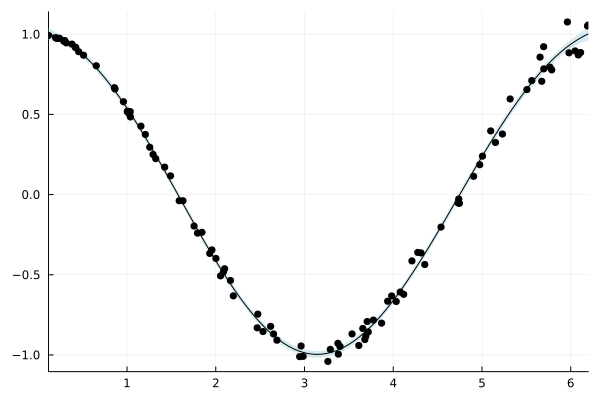

In [19]:
using Optim, Plots
using CRRao, RDatasets, StatsPlots, StatsModels
using StatsModels, DataFrames, Statistics, StatsBase, Distances, GaussianProcesses

struct GPRegression
end
function f(x)
    cos.(x)
end

function fit(formula::Function, data::Vector{Float64}, modelClass::GPRegression, mean, kern::Kernel, 
        DistanceClass::Euclidean)
    Random.seed!(12345);
    n=length(data);
    y = formula(x) .+ 0.05*randn(n);
    logObsNoise = -1.0
    gp = GP(x,y, mean,kern,logObsNoise)
    optimize!(gp)
    return gp
   
end



using DataFrames, RDatasets, Random, SpecialFunctions, Distributions, MLDatasets
x = 2π * rand(100)


#Isotropic kernel and const mean
gp4lin=fit(f,x,GPRegression(),MeanZero(), SE(0.0,0.0),Euclidean()) 
plot(gp4lin, label="")


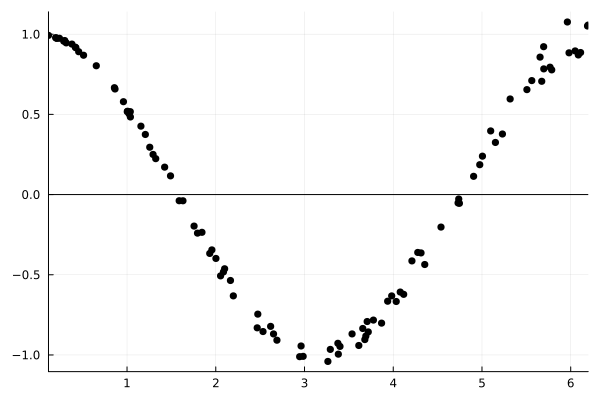

In [20]:
#constant kernel zero mean
gp5lin=fit(f,x,GPRegression(),MeanZero(), Const(0.0),Euclidean()) 
plot(gp5lin,label="")

LinearAlgebra.PosDefException(4)


┌ Warning: Failed to achieve finite new evaluation point, using alpha=0
└ @ LineSearches C:\Users\giggl\.julia\packages\LineSearches\G1LRk\src\hagerzhang.jl:148


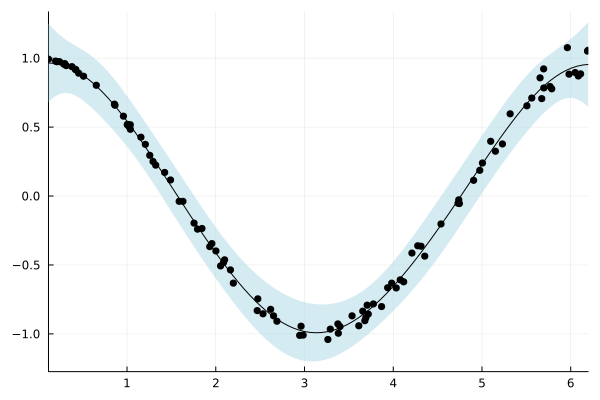

In [21]:
#polynomial mean and squared expon kernel
n=zeros(Float64,1,150)
gp6lin=fit(f,x,GPRegression(),MeanPoly(n), SE(0.0,0.0),Euclidean()) 
plot(gp6lin,label="")

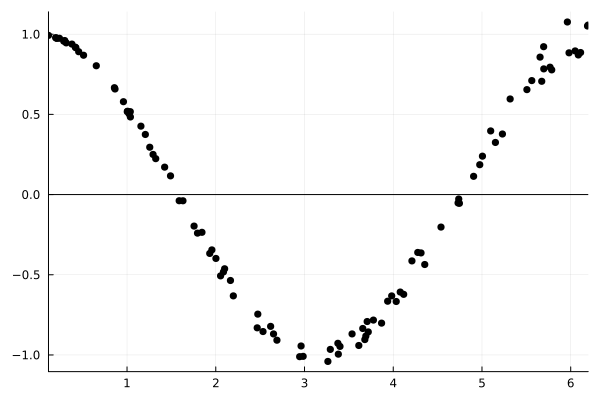

In [23]:
#zero mean linear kernel
gp9lin=fit(f,x,GPRegression(),MeanZero(), Lin(1.0),Euclidean()) 
plot(gp9lin,label="")

LinearAlgebra.PosDefException(4)


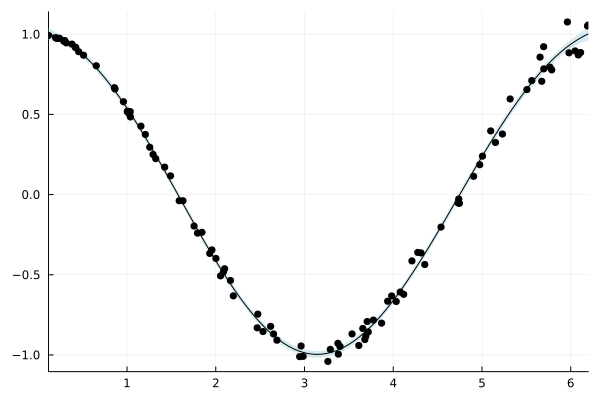

In [26]:

gp8lin=fit(f,x,GPRegression(),MeanZero(), SE(0.0,0.0),Euclidean()) 
plot(gp8lin,label="")

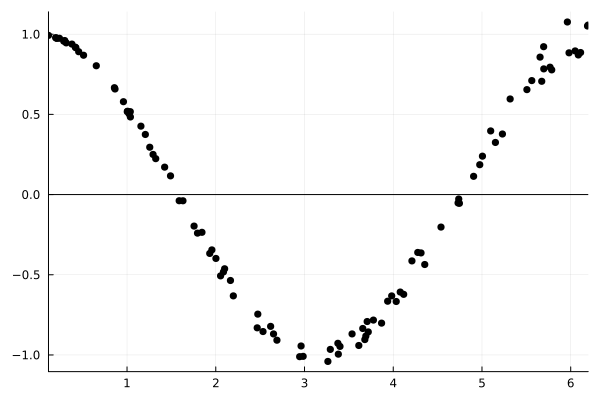

In [58]:
#linear isotropic kernel
gp11lin=fit(f,x,GPRegression(),MeanZero(), LinIso(3.11),Euclidean()) 
plot(gp11lin,label="")

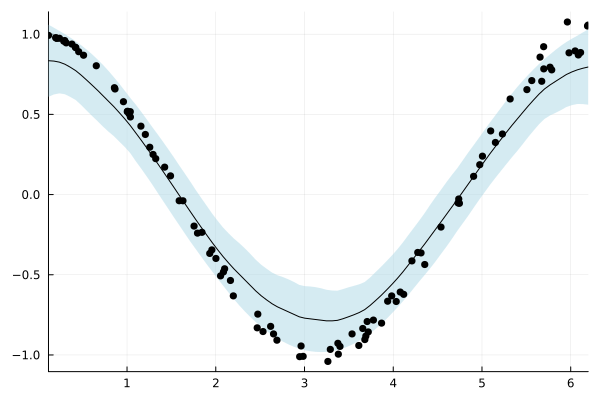

In [28]:
#ARD Matern 1/2 kernel
gp12lin=fit(f,x,GPRegression(),MeanZero(), Mat12Ard(r,0.5),Euclidean()) 
plot(gp12lin,label="")

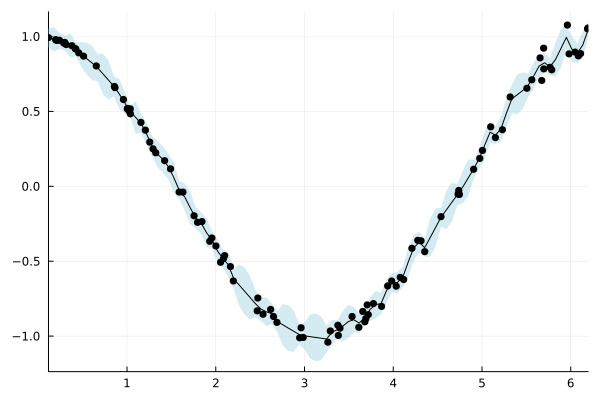

In [29]:
#Isotropic Matern 1/2 kernel
gp13lin=fit(f,x,GPRegression(),MeanZero(), Mat12Iso(0.5,0.5),Euclidean()) 
plot(gp13lin,label="")

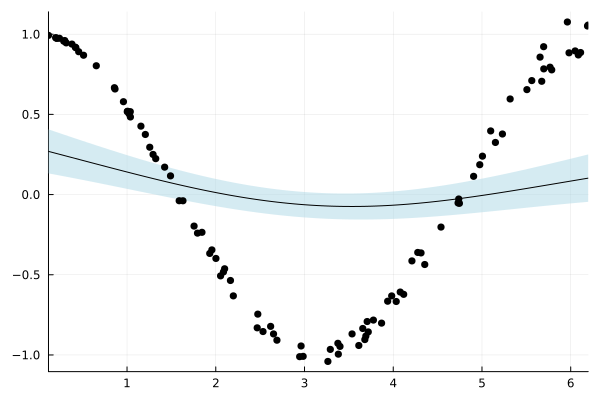

In [57]:
#Isotropic Matern 3/2 kernel
gp14lin=fit(f,x,GPRegression(),MeanZero(), Mat32Ard(x,2.011),Euclidean()) 
plot(gp14lin,label="")

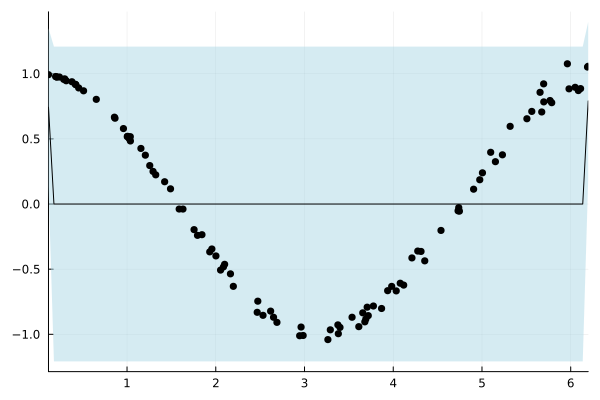

In [37]:
#noise kernel
gp15lin=fit(f,x,GPRegression(),MeanZero(), Noise(0.05),Euclidean())  
plot(gp15lin,label="")

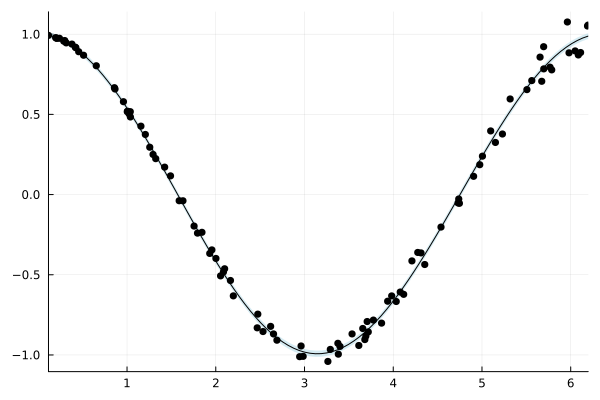

In [51]:
#periodic kernel
gp16lin=fit(f,x,GPRegression(),MeanZero(), Periodic(1.2,1.5,1.2),Euclidean()) 
plot(gp16lin,label="")

LinearAlgebra.PosDefException(6)


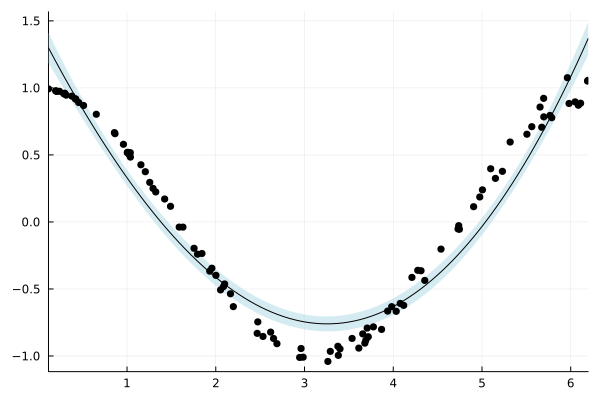

In [43]:
#polynomial kernel 
gp17lin=fit(f,x,GPRegression(),MeanZero(), Poly(0.2,0.1,3),Euclidean()) 
plot(gp17lin,label="")

LinearAlgebra.PosDefException(4)


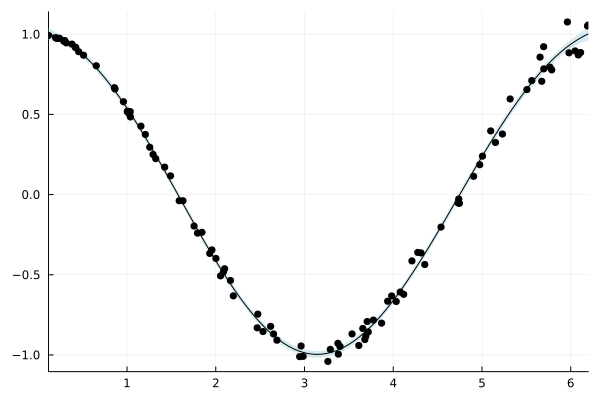

In [44]:
#rational quadratic kernel
gp18lin=fit(f,x,GPRegression(),MeanZero(), RQ(0.2,0.1,0.8),Euclidean()) 
plot(gp18lin,label="")

LinearAlgebra.PosDefException(4)


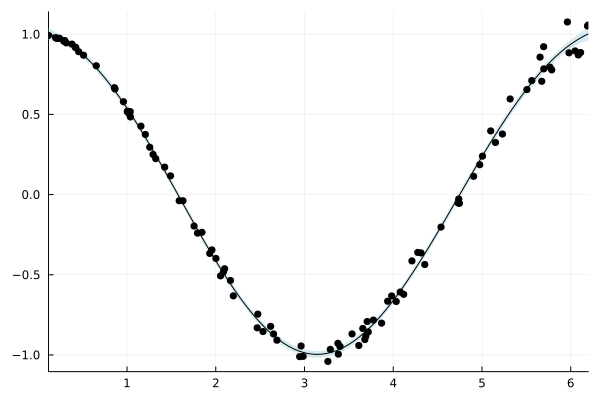

In [45]:
#Isotropic Squared Exponential kernel
gp20lin=fit(f,x,GPRegression(),MeanZero(), SEIso(0.2,0.1),Euclidean()) 
plot(gp20lin,label="")

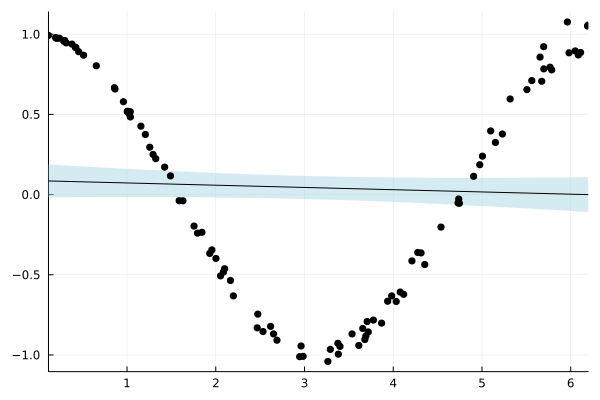

In [48]:
#ARD Squared Exponential kernel
gp21lin=fit(f,x,GPRegression(),MeanZero(), SEArd(x,0.91),Euclidean())
plot(gp21lin,label="")

LinearAlgebra.PosDefException(3)


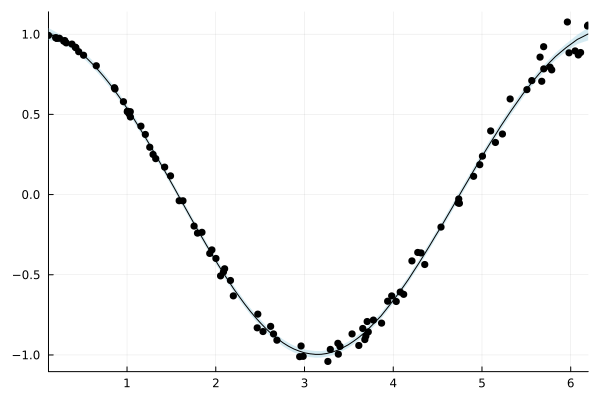

In [49]:
gp19lin=fit(f,x,GPRegression(),MeanZero(), RQIso(0.1,0.2,0.1),Euclidean()) 
plot(gp19lin,label="")